# Scatterplot of lap times

This is an exploration of lap times, and tire types, for pre-race sessions
(practice and qualification) for the 2025 Saudi Arabia Grand Prix.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

driver = 'LEC'
race = 'Jeddah'
season = 2025

In [2]:

# Get FP3 data
fp1 = fastf1.get_session(season, race, 'FP1')
fp1.load()

# Get FP3 data
fp2 = fastf1.get_session(season, race, 'FP2')
fp2.load()

# Get FP3 data
fp3 = fastf1.get_session(season, race, 'FP3')
fp3.load()

q = fastf1.get_session(season, race, 'Q')
q.load()

req         WARNING 	DEFAULT CACHE ENABLED! (4.65 GB) /Users/mjbernha/Library/Caches/fastf1
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '44', '55', '63', '81', '87']
core        

In [3]:
fp1_laps = fp1.laps.pick_quicklaps().reset_index()
fp2_laps = fp2.laps.pick_quicklaps().reset_index()
fp3_laps = fp3.laps.pick_quicklaps().reset_index()
q_laps = q.laps.pick_quicklaps().reset_index()

In [4]:
print(f"fp1 is a {type(fp1)}")
print(f"fp1_laps is a {type(fp1_laps)}")

fp1 is a <class 'fastf1.core.Session'>
fp1_laps is a <class 'fastf1.core.Laps'>


In [5]:
q_laps

,index,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,1,0 days 00:20:01.931000,VER,1,0 days 00:01:28.148000,2.0,1.0,NaT,NaT,0 days 00:00:31.970000,...,True,Red Bull Racing,0 days 00:18:33.783000,2025-04-19 17:05:17.422,1,NaN,False,,False,True
1,4,0 days 00:30:21.107000,VER,1,0 days 00:01:27.778000,5.0,2.0,NaT,NaT,0 days 00:00:31.874000,...,False,Red Bull Racing,0 days 00:28:53.329000,2025-04-19 17:15:36.968,1,NaN,False,,False,True
2,7,0 days 00:43:50.367000,VER,1,0 days 00:01:27.529000,8.0,3.0,NaT,NaT,0 days 00:00:31.710000,...,True,Red Bull Racing,0 days 00:42:22.838000,2025-04-19 17:29:06.477,1,NaN,False,,False,True
3,10,0 days 00:54:05.386000,VER,1,0 days 00:01:27.940000,11.0,4.0,NaT,NaT,0 days 00:00:32.054000,...,False,Red Bull Racing,0 days 00:52:37.446000,2025-04-19 17:39:21.085,1,NaN,False,,False,True
4,14,0 days 01:17:58.462000,VER,1,0 days 00:01:27.559000,15.0,6.0,NaT,NaT,0 days 00:00:31.829000,...,False,Red Bull Racing,0 days 01:16:30.903000,2025-04-19 18:03:14.542,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,273,0 days 00:16:46.025000,OCO,31,0 days 00:01:29.924000,2.0,1.0,NaT,NaT,0 days 00:00:33.075000,...,True,Haas F1 Team,0 days 00:15:16.101000,2025-04-19 17:01:59.740,1,NaN,False,,False,True
83,276,0 days 00:23:06.237000,OCO,31,0 days 00:01:29.398000,5.0,2.0,NaT,NaT,0 days 00:00:32.832000,...,False,Haas F1 Team,0 days 00:21:36.839000,2025-04-19 17:08:20.478,1,NaN,False,,False,True
84,279,0 days 00:30:51.880000,OCO,31,0 days 00:01:29.092000,8.0,3.0,NaT,NaT,0 days 00:00:32.718000,...,True,Haas F1 Team,0 days 00:29:22.788000,2025-04-19 17:16:06.427,12,NaN,False,,False,True
85,282,0 days 00:17:17.408000,BOR,5,0 days 00:01:29.462000,2.0,1.0,NaT,NaT,0 days 00:00:32.653000,...,True,Kick Sauber,0 days 00:15:47.946000,2025-04-19 17:02:31.585,1,NaN,False,,False,True


In [6]:
print(f"FP1: {fp1_laps['LapTime'].min()}   {fp1_laps['LapTime'].max()}")
print(f"FP2: {fp2_laps['LapTime'].min()}   {fp2_laps['LapTime'].max()}")
print(f"FP3: {fp3_laps['LapTime'].min()}   {fp3_laps['LapTime'].max()}")
print(f"Q:   {q_laps['LapTime'].min()}   {q_laps['LapTime'].max()}")

FP1: 0 days 00:01:29.239000   0 days 00:01:35.483000
FP2: 0 days 00:01:28.267000   0 days 00:01:34.434000
FP3: 0 days 00:01:27.489000   0 days 00:01:33.496000
Q:   0 days 00:01:27.294000   0 days 00:01:30.829000


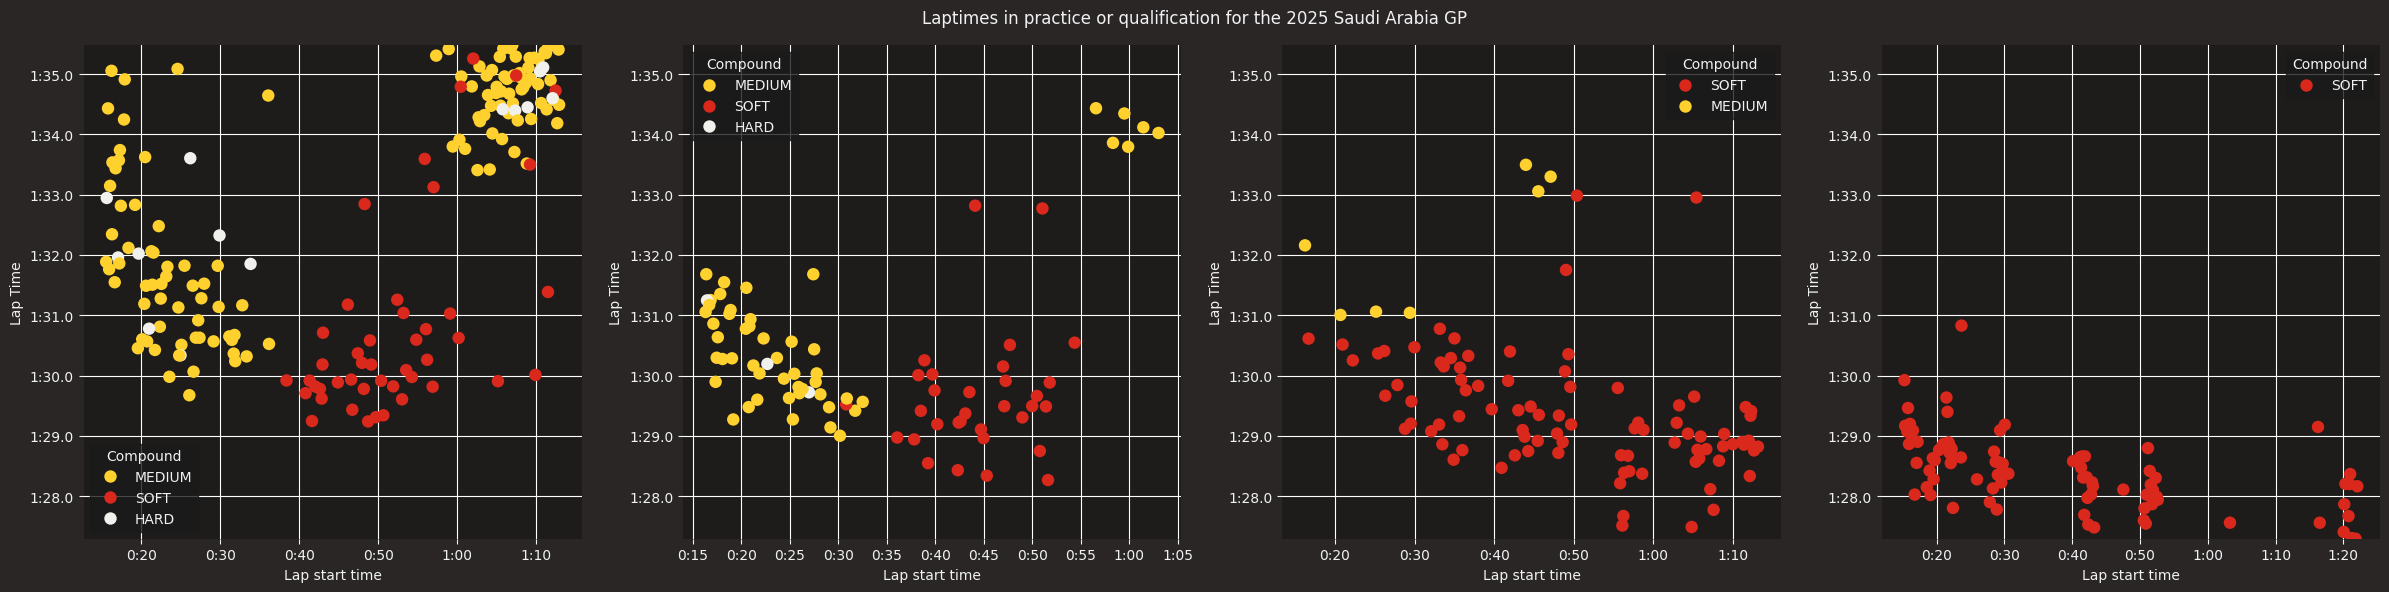

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
fig.suptitle('Lap times in practice and qualification for 2025 Saudi Arabia GP')

sns.scatterplot(data=fp1_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp1),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=fp2_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax2,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp2),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=fp3_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax3,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp3),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=q_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax4,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=q),
                s=80,
                linewidth=0,
                legend='auto'
)

# Set common y-axis limits
common_ylim = (fp1_laps['LapTime'].max(), q_laps['LapTime'].min())
ax1.set_ylim(common_ylim)
ax2.set_ylim(common_ylim)
ax3.set_ylim(common_ylim)
ax4.set_ylim(common_ylim)

ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax2.set_xlabel("Lap start time")
ax2.set_ylabel("Lap Time")

ax3.set_xlabel("Lap start time")
ax3.set_ylabel("Lap Time")

ax4.set_xlabel("Lap start time")
ax4.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

plt.suptitle("Laptimes in practice or qualification for the 2025 Saudi Arabia GP")

# Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')
ax2.grid(color='w', which='major', axis='both')
ax3.grid(color='w', which='major', axis='both')
ax4.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

---

This is the end of the notebook.